In [5]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
data_dir = os.path.join('D:', os.path.sep, 'Prg', 'Trading Bots', 'Market Dataset', 'dukascopy')
EUR_USD_1H = os.path.join(data_dir, 'EURUSD_Candlestick_1_Hour_BID_01.05.2023-18.05.2024.csv')

In [3]:
df_1H = pd.read_csv(EUR_USD_1H)

In [4]:
# Remove Holidays from 1H timeframe data.
df_1H['Date'] = df_1H['Gmt time'].str.split(' ', expand=True)[0]
holidays =  (df_1H[df_1H['Volume'] == 0].groupby('Date').count()['Close'] >= 24).index
df_ops =  df_1H[~ df_1H['Date'].isin(holidays)].copy()
print(df_ops.shape)
df_ops[df_ops['Volume'] == 0]

(6558, 7)


,Gmt time,Open,High,Low,Close,Volume,Date


---------------------
##  Bollinger Bands

**Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price**

In [6]:
time_window = 14
ta.bbands(df_1H.Close, length=time_window)

,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6553,1.083334,1.085566,1.087798,0.411190,0.789956
6554,1.083256,1.085670,1.088084,0.444636,0.850094
6555,1.083209,1.085810,1.088411,0.479134,0.836378
6556,1.083190,1.085891,1.088593,0.497634,0.749562


In [8]:
df_1H = pd.concat([df_1H, ta.bbands(df_1H.Close, length=time_window)], axis=1)
df_1H

,Gmt time,Open,High,Low,Close,Volume,Date,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
0,01.05.2023 00:00:00.000,1.10106,1.10143,1.10045,1.10055,8.127140e+09,01.05.2023,NaN,NaN,NaN,NaN,NaN
1,01.05.2023 01:00:00.000,1.10055,1.10084,1.10020,1.10040,7.000590e+09,01.05.2023,NaN,NaN,NaN,NaN,NaN
2,01.05.2023 02:00:00.000,1.10037,1.10081,1.10007,1.10081,3.727650e+09,01.05.2023,NaN,NaN,NaN,NaN,NaN
3,01.05.2023 03:00:00.000,1.10081,1.10140,1.10053,1.10140,4.344200e+09,01.05.2023,NaN,NaN,NaN,NaN,NaN
4,01.05.2023 04:00:00.000,1.10143,1.10143,1.10032,1.10062,4.607460e+09,01.05.2023,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6553,17.05.2024 16:00:00.000,1.08686,1.08743,1.08671,1.08686,4.743630e+09,17.05.2024,1.083334,1.085566,1.087798,0.411190,0.789956
6554,17.05.2024 17:00:00.000,1.08685,1.08743,1.08682,1.08736,5.049990e+09,17.05.2024,1.083256,1.085670,1.088084,0.444636,0.850094
6555,17.05.2024 18:00:00.000,1.08735,1.08768,1.08719,1.08756,4.968180e+09,17.05.2024,1.083209,1.085810,1.088411,0.479134,0.836378
6556,17.05.2024 19:00:00.000,1.08755,1.08762,1.08705,1.08724,2.584990e+09,17.05.2024,1.083190,1.085891,1.088593,0.497634,0.749562


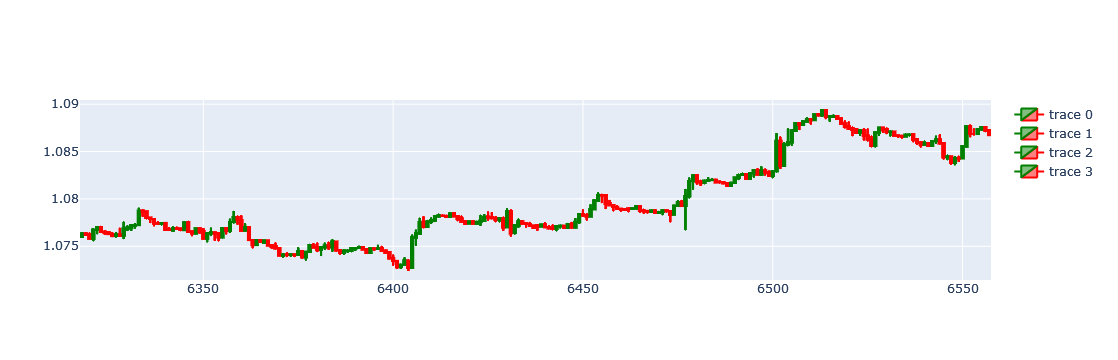

In [20]:
dfpl = df_ops[-240:]
fig.add_trace(go.Candlestick(x=dfpl.index,
                           open=dfpl['Open'],
                           high=dfpl['High'],
                           low=dfpl['Low'],
                           close=dfpl['Close'],
                           increasing_line_color = 'green',
                           decreasing_line_color = 'red'
                          ))
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()